In [ ]:
import cv2
import numpy as np
from PIL import Image, ImageFilter
from google.colab.patches import cv2_imshow

In [70]:
def render(img):
  re_img = cv2.resize(img, (540, 540))
  numDownSamples = 2  
  numBilateralFilters = 50


  # we will down scale the input image
  for _ in range(numDownSamples):
   down_img = cv2.pyrDown(re_img)  
  down_img = cv2.resize(down_img, (540, 540))

  # repeatedly apply small bilateral filter instead of applying
  # one large filter

  #To turn photos into cartoon images, there are two crucial phases. 
  #They are recovering the edges after smoothing them. The colour in this image is smudged
  # to give it a cartoonish appearance, and then we extract the edges and highlight them in the final product.

 # A mask image will be made. Here, we employ the bilateral filter to eliminate noise and, to some part, smooth it.

  for _ in range(numBilateralFilters):
   blur_img = cv2.bilateralFilter(down_img, 11, 11, 11)
  blur_img = cv2.resize(blur_img, (540, 540))


  for _ in range(numDownSamples):
   img_color = cv2.pyrUp(blur_img)
  img_color = cv2.resize(img_color, (540, 540))

  #get the grayscale image 
  gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)


  #now we will get the edges of the smoothed image 
  img_edge = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
          cv2.THRESH_BINARY, 9, 2)
  img_edge = cv2.resize(img_edge, (540, 540))

  resultimage = cv2.bitwise_and(blur_img, img_color, mask = img_edge)
  return resultimage

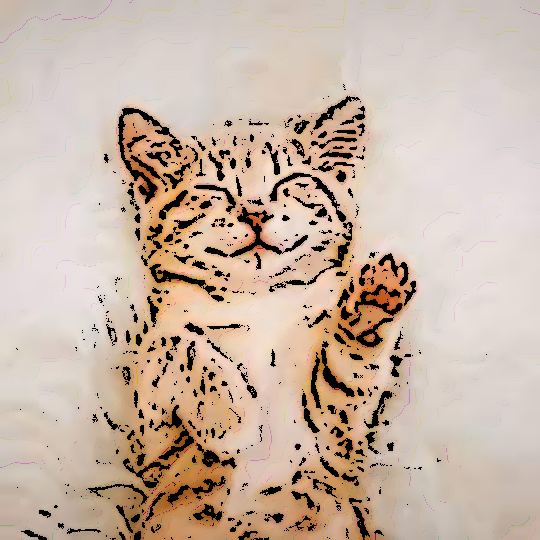

In [75]:
img = cv2.imread("2.jpg")
img_color=render(img)
cv2_imshow(img_color)

In [ ]:
!pip install -q gradio

     |████████████████████████████████| 13.8 MB 7.3 MB/s 
     |████████████████████████████████| 2.3 MB 72.4 MB/s 
     |████████████████████████████████| 56 kB 5.0 MB/s 
     |████████████████████████████████| 84 kB 4.5 MB/s 
     |████████████████████████████████| 106 kB 72.7 MB/s 
     |████████████████████████████████| 55 kB 4.2 MB/s 
     |████████████████████████████████| 278 kB 80.2 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 64 kB 3.2 MB/s 
     |████████████████████████████████| 80 kB 9.5 MB/s 
     |████████████████████████████████| 69 kB 8.8 MB/s 
     |████████████████████████████████| 58 kB 7.0 MB/s 
     |████████████████████████████████| 50 kB 6.8 MB/s 


In [74]:
import gradio as gr

gr.Interface(fn=render, 
             inputs="image",
             outputs="image",
             title = "Cartoonify Images",
             description = "This application can cartoonify your images with a paint brush effect").launch(share = 'True')

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://5793f25e-8e8d-439c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
